# Steps

#### 1. Importing Essentail Libraries
#### 2. PreProcessing  
#### 3. Data Spliting 
#### 4. Feature Scaling
#### 5. Model Training ( Random Forest, SVM )
#### 6. Hyper Parameter Tuning 

## Importing Essential Libraries

In [4]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Data PreProcessing

### Data Loading

In [ ]:
# Load the dataset as a Pandas dataframe and display the head

df = pd.read_csv("train.csv")
df.head(20)

In [4]:
# Check for null values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.describe()
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Handling Null values
df.isnull().sum()

In [ ]:
# Dropping null values
df = df.dropna()
df.isnull().sum()

In [8]:
# Manage duplicate values
df.duplicated().sum() 
# No duplicate values


0

### Encoding

In [ ]:
df.head()


In [8]:
df.replace({"satisfaction": {"satisfied": 1, "neutral or dissatisfied": 0},
            "Gender": {"Male": 1, "Female": 0},
            "Customer Type": {"Loyal Customer": 1, "disloyal Customer": 0},
            "Type of Travel": {"Personal Travel": 1, "Business travel": 0},
            "Class": {"Eco Plus": 1, "Business": 0, "Eco": 2},
            }, inplace = True)

C:\Users\nemal\AppData\Local\Temp\ipykernel_1248\851535318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"satisfaction": {"satisfied": 1, "neutral or dissatisfied": 0},


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers as those falling outside 1.5*IQR
outliers = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

# Print the number of outliers per column
print(outliers.sum())

## Feature Selection

In [9]:
# Seperate the feature columns and targer using pandas functions

x = df.drop('satisfaction', axis=1)
y = df['satisfaction']

print(x.shape, y.shape)

(103594, 23) (103594,)


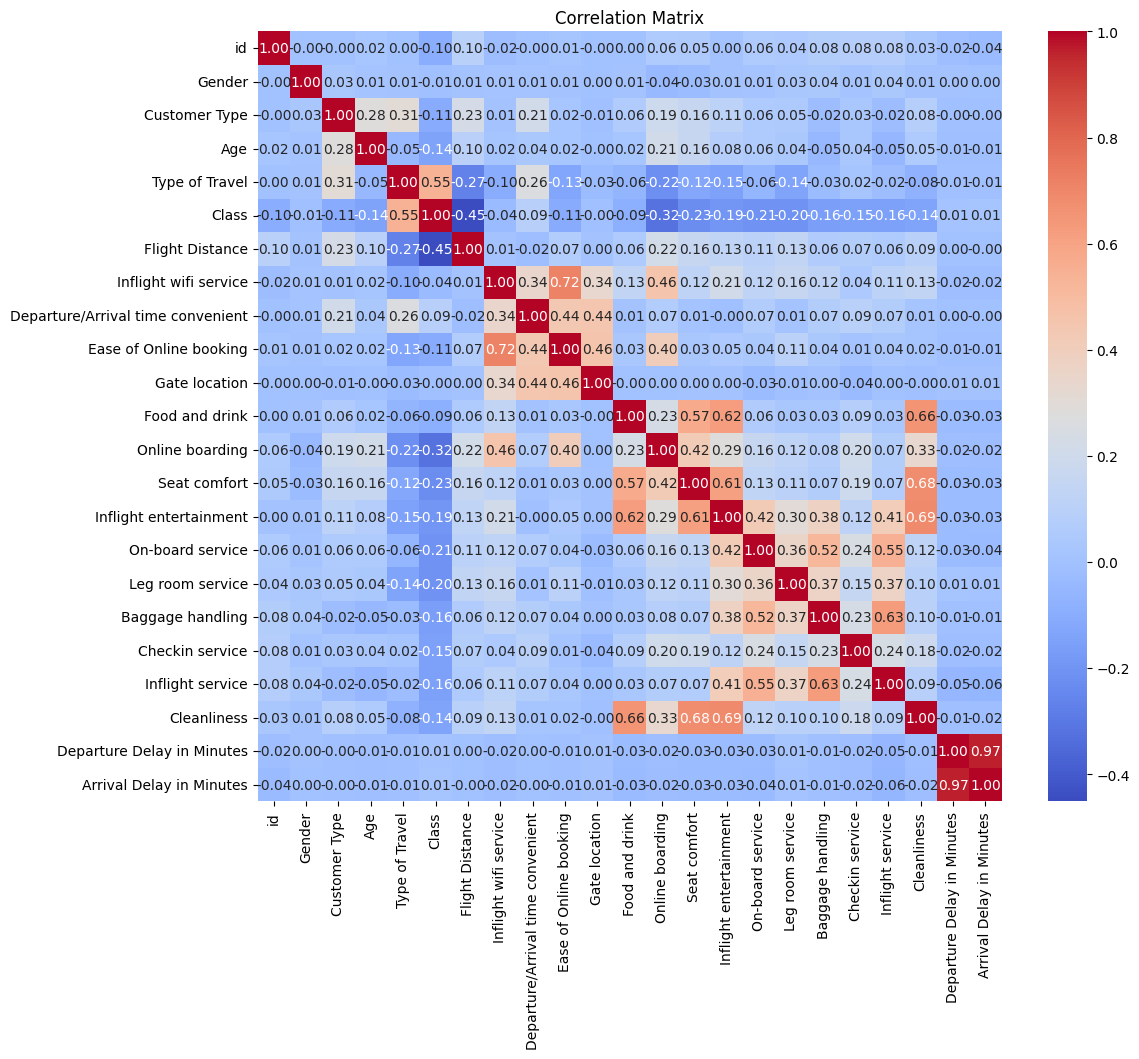

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = x.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [72]:
# Identify pairs of highly correlated features
threshold = 0.8
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                   if i != j and abs(corr_matrix.loc[i, j]) > threshold]

print("Highly correlated feature pairs:", high_corr_pairs)


Highly correlated feature pairs: [('Departure Delay in Minutes', 'Arrival Delay in Minutes'), ('Arrival Delay in Minutes', 'Departure Delay in Minutes')]


In [10]:
# Dropping identified redundant features
x = x.drop(columns=['Departure Delay in Minutes','id'])  # Replace with identified redundant columns


In [ ]:
x.info()

## Train Test Split

In [11]:
# Split dataset into train and test sets

# Your code here
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Feature Scaling

In [12]:
# Scale the data using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(72515, 21) (72515,)
(31079, 21) (31079,)


## Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [20]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred_rf = rf_classifier.predict(X_train_scaled)
y_test_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy and print classification report
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Train Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.4f}")
print("\nRandom Forest Classification Report on Test Set:\n", classification_report(y_test, y_test_pred_rf))


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9608

Random Forest Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17583
           1       0.97      0.94      0.95     13496

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079



## SVM Model

In [86]:
# Initialize SVM Classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred_svm = svm_classifier.predict(X_train_scaled)
y_test_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate accuracy and print classification report
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM Train Accuracy: {train_accuracy_svm:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm:.4f}")
print("\nSVM Classification Report on Test Set:\n", classification_report(y_test, y_test_pred_svm))


SVM Train Accuracy: 0.8779
SVM Test Accuracy: 0.8730

SVM Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     17583
           1       0.88      0.82      0.85     13496

    accuracy                           0.87     31079
   macro avg       0.87      0.87      0.87     31079
weighted avg       0.87      0.87      0.87     31079



In [89]:
from sklearn.svm import LinearSVC

# LinearSVC Classifier
linear_svm_classifier = LinearSVC(random_state=42, max_iter=10000)
linear_svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_linear_svm = linear_svm_classifier.predict(X_train_scaled)
y_test_pred_linear_svm = linear_svm_classifier.predict(X_test_scaled)

# Performance Metrics
print("LinearSVC - Train Accuracy:", accuracy_score(y_train, y_train_pred_linear_svm))
print("LinearSVC - Test Accuracy:", accuracy_score(y_test, y_test_pred_linear_svm))
print("\nLinearSVC Classification Report (Test Set):\n", classification_report(y_test, y_test_pred_linear_svm))


LinearSVC - Train Accuracy: 0.8759980693649589
LinearSVC - Test Accuracy: 0.8705235046172657

LinearSVC Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     17583
           1       0.87      0.83      0.85     13496

    accuracy                           0.87     31079
   macro avg       0.87      0.87      0.87     31079
weighted avg       0.87      0.87      0.87     31079



In [ ]:
from sklearn.linear_model import SGDClassifier

# SGD Classifier with hinge loss
sgd_svm_classifier = SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3)
sgd_svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_sgd = sgd_svm_classifier.predict(X_train_scaled)
y_test_pred_sgd = sgd_svm_classifier.predict(X_test_scaled)

# Performance Metrics
print("SGD Classifier - Train Accuracy:", accuracy_score(y_train, y_train_pred_sgd))
print("SGD Classifier - Test Accuracy:", accuracy_score(y_test, y_test_pred_sgd))
print("\nSGD Classifier Classification Report (Test Set):\n", classification_report(y_test, y_test_pred_sgd))


SGD Classifier - Train Accuracy: 0.8733917120595739
SGD Classifier - Test Accuracy: 0.8702660960777374

SGD Classifier Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     17583
           1       0.88      0.82      0.85     13496

    accuracy                           0.87     31079
   macro avg       0.87      0.86      0.87     31079
weighted avg       0.87      0.87      0.87     31079



## Hyper Parameter Tuning

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=30,  # Reduce the number of combinations
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [24]:
# Get the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on training data
y_train_pred = best_rf_model.predict(X_train_scaled)

# Predict on test data
y_test_pred = best_rf_model.predict(X_test_scaled)


In [26]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Tuned Random Forest Train Accuracy: {train_accuracy:.4f}")
print(f"Tuned Random Forest Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Tuned Random Forest Train Accuracy: 1.0000
Tuned Random Forest Test Accuracy: 0.9616

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17583
           1       0.97      0.94      0.96     13496

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079



In [14]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate on the test set
y_pred = random_search.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Test Accuracy: 0.9630296985102481
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17583
           1       0.97      0.94      0.96     13496

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079



## Using XGboost ensemble with optuna

In [16]:
import optuna
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the objective function for XGBoost
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0)
    }
    
    clf = xgb.XGBClassifier(**param, random_state=42)
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
    return scores.mean()

# Define the objective function for Random Forest
def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    
    clf = RandomForestClassifier(**param, random_state=42)
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
    return scores.mean()

# Optimize XGBoost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)

# Optimize Random Forest
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=30)

print("Best XGBoost Parameters:", study_xgb.best_trial.params)
print("Best Random Forest Parameters:", study_rf.best_trial.params)

# Extract best parameters
best_params_xgb = study_xgb.best_trial.params
best_params_rf = study_rf.best_trial.params


d:\2024software\Anaconda\envs\uni_ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-04 12:28:50,318] A new study created in memory with name: no-name-bbb88e09-d729-4c15-bd63-fb36fcd97a73
C:\Users\nemal\AppData\Local\Temp\ipykernel_1248\2365359301.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\nemal\AppData\Local\Temp\ipykernel_1248\2365359301.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.sugges

Best XGBoost Parameters: {'n_estimators': 148, 'max_depth': 10, 'learning_rate': 0.08139373087506031, 'subsample': 0.7778680147424462, 'colsample_bytree': 0.8061071982153041, 'gamma': 1.4080680303412608e-05}
Best Random Forest Parameters: {'n_estimators': 134, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [17]:
# Initialize the models with the best parameters
best_xgb = xgb.XGBClassifier(**best_params_xgb, random_state=42)
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf)],
    voting='soft'  # Use 'soft' voting to average the predicted probabilities
)

# Fit the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test_scaled)
print("Voting Classifier Test Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))


Voting Classifier Test Accuracy: 0.9643489172753306
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17583
           1       0.97      0.94      0.96     13496

    accuracy                           0.96     31079
   macro avg       0.97      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079

